In [30]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

In [31]:
fname = "Horsehead.fits"
hdu_list = fits.open(fname)
hdu_list.info()

Filename: Horsehead.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     161   (891, 893)   int16   
  1  er.mask       1 TableHDU        25   1600R x 4C   [F6.2, F6.2, F6.2, F6.2]   


In [32]:
image_data = hdu_list[0].data

In [33]:
print(type(image_data))
print(image_data.shape)

<class 'numpy.ndarray'>
(893, 891)


In [34]:
hdu_list.close()

In [35]:
image_data = fits.getdata(fname)
print(type(image_data))
print(image_data.shape)

<class 'numpy.ndarray'>
(893, 891)


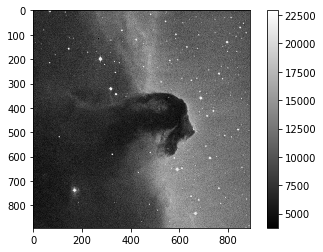

In [36]:
plt.imshow(image_data,cmap='gray')
plt.colorbar()

In [37]:
print('Min:', np.min(image_data))
print('Max:', np.max(image_data))
print('Mean:',np.mean(image_data))
print('Stdev:',np.std(image_data))

Min: 3759
Max: 22918
Mean: 9831.481676287574
Stdev: 3032.3927542049046


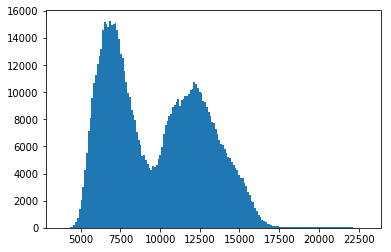

In [38]:
histogram = plt.hist(image_data.flatten(), bins='auto')

In [26]:
from matplotlib.colors import LogNorm

[Text(1, 0, '5,000'), Text(1, 0, '10,000'), Text(1, 0, '20,000')]

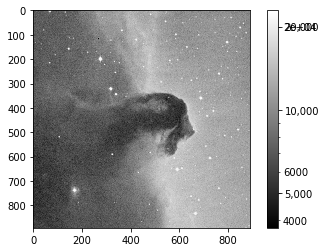

In [40]:
plt.imshow(image_data, cmap='gray', norm=LogNorm())

#Choose the tick marks based on the histogram above
cbar = plt.colorbar(ticks=[5.e3,1.e4,2.e4])
cbar.ax.set_yticklabels(['5,000','10,000','20,000'])

In [60]:
#make a list of filenames
image_list = ['M13_blue_0001.fits','M13_blue_0002.fits','M13_blue_0003.fits', \
              'M13_blue_0004.fits', 'M13_blue_0005.fits']

In [61]:
#make an array of images from the list of images
image_concat = [fits.getdata(image) for image in image_list]

In [62]:
final_image = np.sum(image_concat, axis=0)

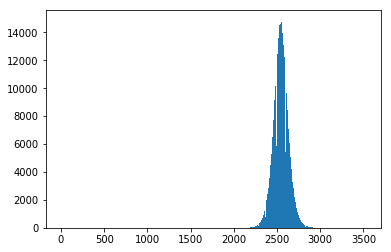

In [63]:
image_hist = plt.hist(final_image.flatten(), bins='auto')

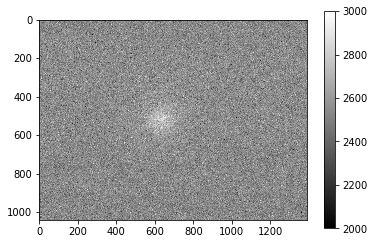

In [64]:
plt.imshow(final_image, cmap='gray', vmin = 2E3, vmax=3E3)
plt.colorbar()

In [65]:
outfile = 'stacked_M13_blue.fits'
hdu = fits.PrimaryHDU(final_image)
hdu.writeto(outfile, overwrite=True)